In [61]:
import pandas as pd
import numpy as np

In [62]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/InClassAssignments/InClassAssignment3ANN/Breast_Cancer.csv")

In [63]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                564 non-null    object 
 1   radius_mean              564 non-null    float64
 2   texture_mean             564 non-null    float64
 3   perimeter_mean           564 non-null    float64
 4   area_mean                564 non-null    float64
 5   smoothness_mean          564 non-null    float64
 6   compactness_mean         564 non-null    float64
 7   concavity_mean           564 non-null    float64
 8   concave points_mean      564 non-null    float64
 9   symmetry_mean            564 non-null    float64
 10  fractal_dimension_mean   564 non-null    float64
 11  radius_se                564 non-null    float64
 12  texture_se               564 non-null    float64
 13  perimeter_se             564 non-null    float64
 14  area_se                  5

In [65]:
data.diagnosis.value_counts()

B    355
M    209
Name: diagnosis, dtype: int64

Creating X and Y

In [66]:
X = data.drop("diagnosis", axis = 1)
y = data.diagnosis

In [67]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)

Spliting data (w/ stratification)

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

In [69]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

###Building ANN Model

In [70]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
n_features = X_train.shape[1]

In [72]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape = (n_features, )))

model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

### Compiling the Model

In [73]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###Fitting the Model

In [74]:
BCan = model.fit(X_train, y_train, 
                    epochs = 150,
                    validation_data = (X_test, y_test),
                    batch_size = 32,
                    verbose = 0)

###Model Validation

In [75]:
loss, acc = model.evaluate(X_test,y_test, verbose = 0)

print(f"the loss is {loss}, the accuracy is {acc}")

the loss is 0.15604723989963531, the accuracy is 0.9734513163566589


##Visualization

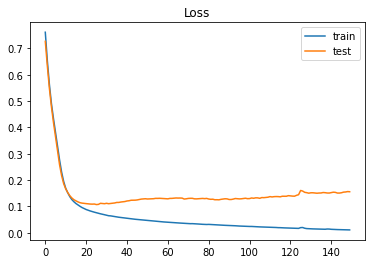

In [76]:
#Loss(x axis is the number of iterations)
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(BCan.history['loss'], label = 'train')
plt.plot(BCan.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [77]:
###Overfitting train model

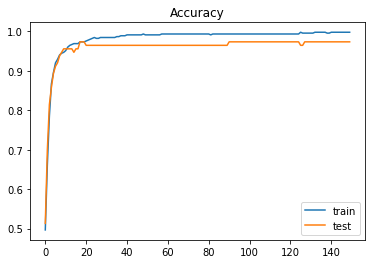

In [79]:
#Accuracy (x axis is the number of iterations)
plt.title('Accuracy')
plt.plot(BCan.history['accuracy'], label = 'train')
plt.plot(BCan.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

##Confusion Matrix and Classification Report

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
y_pred = model.predict(X_test)
y_pred = (y_pred> 0.5)

4/4 [==============================] - 0s 3ms/step


In [84]:
confusion_matrix(y_test,y_pred)

array([[70,  1],
       [ 2, 40]])

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        42

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



###Validation